[View in Colaboratory](https://colab.research.google.com/github/Nighty13/Traffic-Signs-Recognition/blob/master/Traffic_Signs_CNN.ipynb)

In [181]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [182]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
import pickle
import pandas as pd
import random

In [0]:
np.random.seed(0)

In [0]:
with open('german-traffic-signs/train.p','rb') as f:
  train_data=pickle.load(f)
with open('german-traffic-signs/valid.p','rb') as f:
  val_data=pickle.load(f)
with open('german-traffic-signs/test.p','rb') as f:
  test_data=pickle.load(f)

In [186]:
print(type(train_data))
X_train, y_train=train_data['features'],train_data['labels']
X_val, y_val=val_data['features'],val_data['labels']
X_test, y_test=test_data['features'],test_data['labels']

<class 'dict'>


In [187]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [0]:
assert(X_train.shape[0]==y_train.shape[0]),"The number of images is not equal to the number of labels"
assert(X_val.shape[0]==y_val.shape[0]),"The number of images is not equal to the number of labels"
assert(X_test.shape[0]==y_test.shape[0]),"The number of images is not equal to the number of labels"
assert(X_train.shape[1:]==(32,32,3)),"The number of images is not equal to the number of labels"
assert(X_val.shape[1:]==(32,32,3)),"The number of images is not equal to the number of labels"
assert(X_test.shape[1:]==(32,32,3)),"The number of images is not equal to the number of labels"

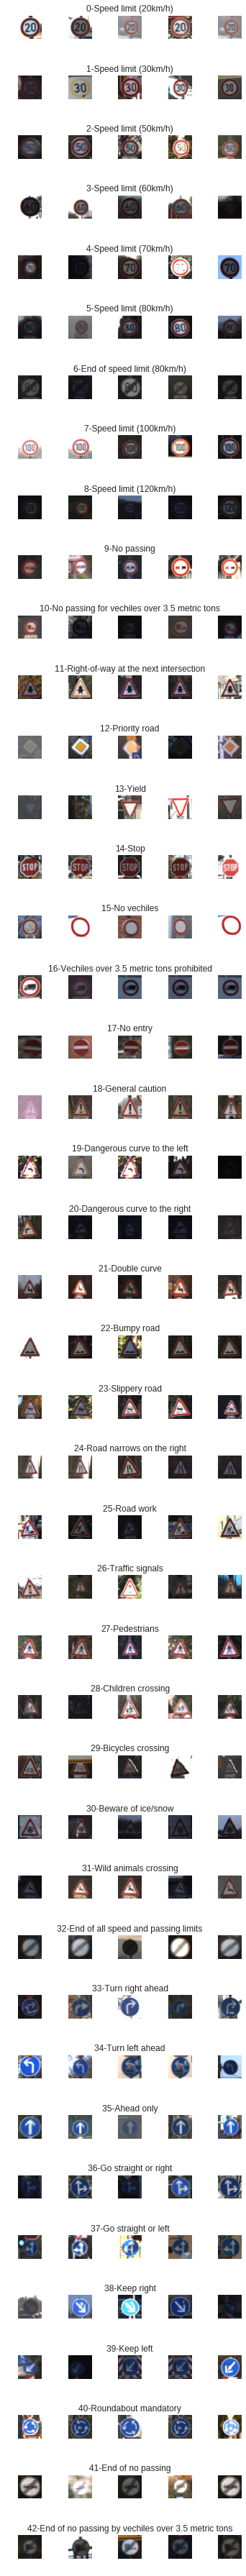

In [189]:
data=pd.read_csv('german-traffic-signs/signnames.csv')

num_of_samples=[]
 
cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j)+"-"+row["SignName"])
        num_of_samples.append(len(x_selected))
        
    #(index,Series)

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


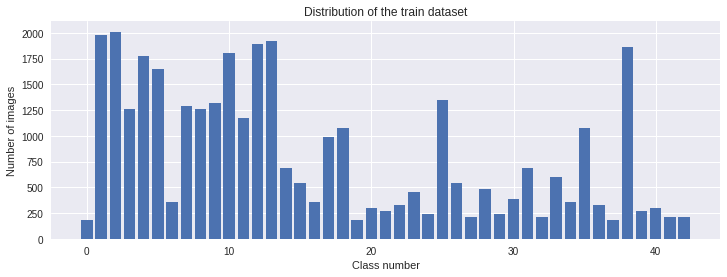

In [190]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
36


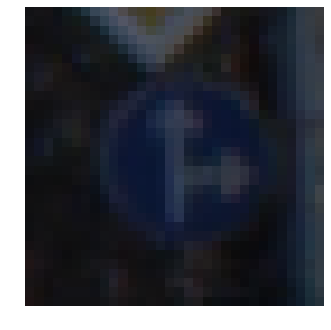

In [191]:
import cv2

plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

In [0]:
def grayscale(img):
  img= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img

(32, 32)


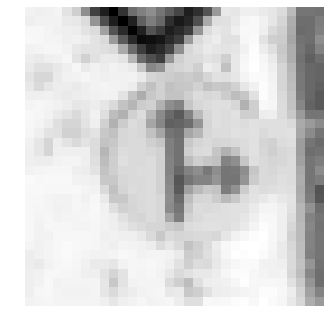

In [193]:
img=grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")
print(img.shape)

In [0]:
def equalize(img):
  img=cv2.equalizeHist(img)
  return img

(32, 32)


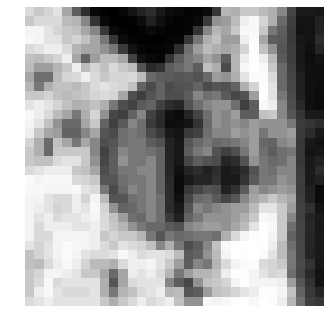

In [195]:
img=equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)

In [0]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img

X_train=np.array(list(map(preprocessing,X_train)))
X_val=np.array(list(map(preprocessing,X_val)))
X_test=np.array(list(map(preprocessing,X_test)))

(34799, 32, 32)


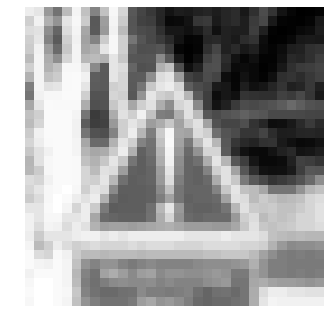

In [197]:
plt.imshow(X_train[random.randint(0,len(X_train)-1)])
plt.axis("off")
print(X_train.shape)

In [0]:
X_train=X_train.reshape(34799,32,32,1)
X_test=X_test.reshape(12630,32,32,1)
X_val=X_val.reshape(4410,32,32,1)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(width_shift_range=0.1,
                  height_shift_range=0.1,
                  zoom_range=0.2,
                  shear_range=0.1,
                  rotation_range=10)
datagen.fit(X_train)

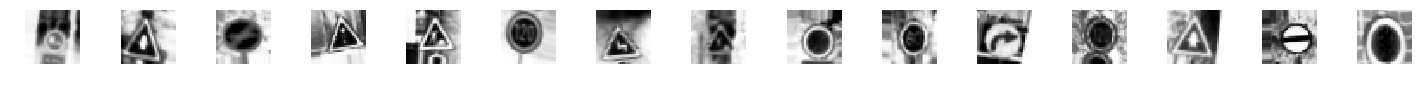

In [200]:
batches=datagen.flow(X_train,y_train,batch_size=20)
X_batch,y_batch=next(batches)
fig,axs=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()
for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32,32))
  axs[i].axis('off')

In [201]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [0]:
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)
y_val=to_categorical(y_val,43)

In [0]:
def modified_model():
  model=Sequential()
  model.add(Conv2D(60,(5,5),input_shape=(32,32,1),activation='relu'))
  model.add(Conv2D(60,(5,5),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(30,(3,3),activation='relu'))
  model.add(Conv2D(30,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  #model.add(Dropout(0.5))
  
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(lr = 0.001), loss = 'categorical_crossentropy' , metrics = ['accuracy'])
  return model

In [204]:
model = modified_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 480)               0         
__________

In [205]:
history=model.fit_generator(datagen.flow(X_train,y_train,batch_size=50),steps_per_epoch=2000,epochs=10,validation_data=(X_val,y_val),shuffle=1)

Epoch 1/10
2000/2000 [==============================] - 58s 29ms/step - loss: 0.8639 - acc: 0.7438 - val_loss: 0.1132 - val_acc: 0.9678
Epoch 2/10
2000/2000 [==============================] - 57s 29ms/step - loss: 0.1997 - acc: 0.9386 - val_loss: 0.0748 - val_acc: 0.9785
Epoch 3/10
2000/2000 [==============================] - 57s 28ms/step - loss: 0.1332 - acc: 0.9585 - val_loss: 0.0402 - val_acc: 0.9914
Epoch 4/10
2000/2000 [==============================] - 57s 28ms/step - loss: 0.1057 - acc: 0.9674 - val_loss: 0.0315 - val_acc: 0.9916
Epoch 5/10
2000/2000 [==============================] - 57s 29ms/step - loss: 0.0885 - acc: 0.9725 - val_loss: 0.0457 - val_acc: 0.9884
Epoch 6/10
2000/2000 [==============================] - 57s 29ms/step - loss: 0.0791 - acc: 0.9761 - val_loss: 0.0420 - val_acc: 0.9887
Epoch 7/10
2000/2000 [==============================] - 57s 29ms/step - loss: 0.0704 - acc: 0.9783 - val_loss: 0.0425 - val_acc: 0.9884
Epoch 8/10
2000/2000 [==========================

Text(0.5,0,'epoch')

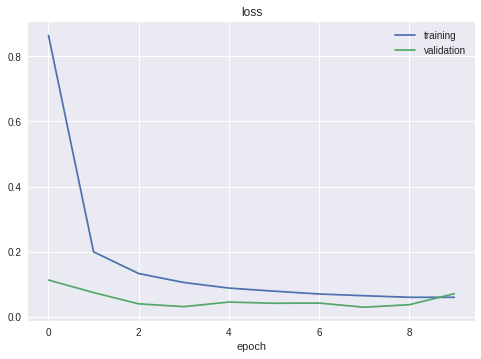

In [206]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5,0,'epoch')

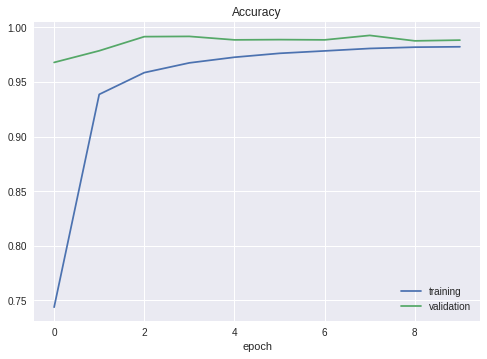

In [207]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [208]:
score=model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

Test Score: 0.14097800453952583
Test Accuracy: 0.9698337292350292


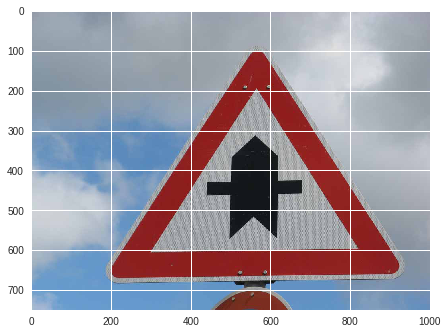

In [230]:
import requests
from PIL import Image
#url='https://image.ibb.co/gxikt0/UPLV2.png'
#url='https://image.ibb.co/djumi0/UPL.png'
url='http://bicyclegermany.com/Images/Laws/100_1607.jpg'
r=requests.get(url,stream=True)
img=Image.open(r.raw)
plt.imshow(img,cmap=plt.get_cmap('gray'))

(32, 32)


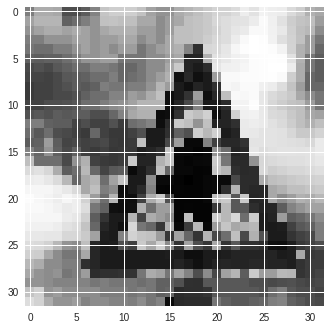

In [231]:
img=np.asarray(img)
img=cv2.resize(img,(32,32))
img=preprocessing(img)
plt.imshow(img,cmap=plt.get_cmap('gray'))
print(img.shape)

In [0]:
img=img.reshape(1,32,32,1)

In [233]:
print("sign prediction class:"+str(model.predict_classes(img)))

sign prediction class:[11]
